# Forventningsverdi, den store tall lov og fordelinger

I denne notatboka skal vi se igjen på forventningsverdi, utforske litt den så kallt store talls lov og lære om en ny fordeling, den hypergeometrisk fordeling.

#### Innhold:
* [Forventningsverdi](#sec1_forv)
* [Den store talls lov](#sec2_stl)
* [Hypergeometrisk fordeling](#sec3_hygeo)

## Forventningsverdi <a class="anchor" id="sec1_forv"></a>

Siste gang lærte vi om forventningsverdier av tilfeldige variabler. Som repetisjon la oss se på det igjen:

#### Definisjon forventningsverdi

Hvis $X$ er en tilfeldig variabel med endelig mange mulige verdier $v_1 , \ldots , v_N, N \in \mathbb{N}$.
Så er forventningsverdien til $X$ gitt som 

$$\mathbb{E}(X) = v_1 P(X=v_1) + v_2 P(X=v_2) + \cdots + v_N P(X=v_N) = \sum_{k=1}^N v_k P(X=k).$$

##### Egenskaper til forventningsverdien

Hvi $X,Y$ er tilfeldige variabler og $a$ er ett tall så gjelder 
$$\mathbb{E} (X+Y) = \mathbb{E} (X) + \mathbb{E}(Y) , \quad \mathbb{E}(aX) = a \mathbb{E}(X).$$
Vi sier at **forventningsverdien er linear**.

Forventningsverdien tolkes som den verdien gjennomsnitten av den tilfeldige variablen tilnærmerer seg etter mange forsøk:

In [ ]:
#Simulasjon av et myntspill hvor vi knipser et fair mynt og får 1 kron når vi knipser mynt og må betale 2 kron når 
#kron dukker opp

#Importer pakker og sett opp alt for plotting...
import random
%matplotlib inline 
from numpy import *               
from matplotlib.pyplot import *   
newparams = {'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 16}
rcParams.update(newparams)

#Den tilfeldige variablen defineres nå
def G ():
    if random.random() <=0.5:
        return(-2)
    else:
        return(1)
lgjen = [G()]     #Løpende gjennomsnitt
for i in range(1,1000):
    lgjen.append((G()+(i-1)*lgjen[i-1])/i)
x=range(1000) 
forvented = [-0.5]*(1000)     #Forventningsverdi: Sjekk at det er virklig ^-0.5
plot(x, lgjen, 'b-')
plot(x,forvented, 'r--')
xlabel('antall spill')
ylabel('løpende gjenomsnitt')
title('Løpende gjennomsnitt av gevinst (eller tap) over 1000 myntspill')

### Forventningsverdi til en binomisk fordelt variabel

Vi skal se på et tilfeldig forsøk som har to utfall (f.eks. myntkast hvor vi tolker en utfall som suksess og den andre som tap). Som vi har lært kan vi beskrive den situasjonen med binomisk fordeling. 

Hvis sannsynlighet for å får suksess er $p$ er sannsynligheten for den motsatte hendelse $1-p$. Vi er interessert i forventningsverdi til en tilfeldig variabel $X$ som modellerer et binomisk forsøk med $n$ steg. Husk at sannsynlighet for å få akkurat $k$suksess ved $n$ forsøk er gitt som 
$$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}.$$
Dermed sier formelen for forventningsverdi at vi må beregne 
$$\mathbb{E}(X) = \sum_{k=0}^n k P(X=k) = \sum_{k=0}^nk\binom{n}{k}p^k(1-p)^{n-k} = np$$
Det er nå helt uklart hvordan man kommer til den enkle formen av forventningsverdi som står på høyre (regning med summen og binomialkoeffisienter er vanskelig!). Det fins en enklere måte å finne forventningsverdi til $X$:

#### Oppgave 
(a) Antar at $F$ er en tilfeldig variabel som tar to verdier $F(\text{suksess}) = 1$ og $F(\text{tap}) = 0$. Beregn forventningsverdi til $F$ (hvis suksess har sjansen $p$). 

**Plass for ditt svar, dobbeltklikk her for å skrive noe**

Vi er egentlig interessert i forventningsverdi til variablen $X$ som beskriver et binomisk forsøk med $n$-steg (variablen $F$ fra (a) gir oss bare pågrep på forventningsverdi til et binomisk forsøk med $n=1$-steg).

For å komme oss frem med saken, la oss introdusere de tilfeldige variabler
$$F_i= \begin{cases}
  1 \text{ hvis vi får en suksess i steg } i\\
  0 \text{ hvis steg } i \text{ er ikke en suksess}
  \end{cases} \text{for } i =1,2,\ldots, n
$$
(b) Antar at vi bare ser på de tilfeldige variabler $F_1$ og $F_2$. Vi kan addere $V = F_1 + F_2$ og får en tilfeldig variabel. Beskriv i ord hva betydning av den nye variablen $V$ er. Deretter beregn forventningsverdi til $V$.

**Plass for ditt svar, dobbeltklikk her for å skrive noe**

(c) Er det mulig å utrykke den tilfeldige variabel 
$$X= \text{Antall av suksess i forsøket med }n\text{-steg}$$ ved hjelp av de tilfeldige variabeler $F_i, i=1,\ldots, n$?

**Plass for ditt svar, dobbeltklikk her for å skrive noe**

(d) Se på følgende utregning av forventningsverdi til $X$ og diskuter med hverandre hvorfor det gir mening og hva betydning til de steg er:  
Tips: Vi bruker summetegn i formelen, hvis du er ikke vet hvordan man bruker den prøv å sette inn $\sum_{i=1}^n F_i = F_1 + F_2 + \cdots + F_n$.

Steg 1. $$\mathbb{E}(X) = \mathbb{E}\left(\sum_{i=1}^n F_i \right)$$  
Steg 2. Siden $X$ er sammensatt av de tilfeldige variabler $F_i$ beskriver summen av forventningsverdier til de $F_i$ forventningsverdi til $X$, dvs. 
$$\mathbb{E}(X) = \mathbb{E}\left(\sum_{i=1}^n F_i \right) = \sum_{i=1}^n \mathbb{E}(F_i)$$
Steg 3. Med (a) får vi $\mathbb{E}(X)= \sum_{i=1}^n p = np$.

**Plass for ditt svar, dobbeltklikk her for å skrive noe**

## Den store talls lov <a class="anchor" id="sec2_stl"></a>

Vi har sett i simulasjoner lagt med Python at den løpende gjennomsnitt tilnærmerer seg forventningsverdien når vi gjentar eksperimentet mange ganger. Skjer det også i virkeligheten?

### Kerrich experiment

[John Edmund Kerrich](https://en.wikipedia.org/wiki/John_Edmund_Kerrich) (1903–1985) var en matematiker kjent for en rekke sannsynlighetseksperimenter som han utførte mens han var internert i det nazi-okkuperte Danmark på 1940-tallet.

For eksempel brukte han tiden sin for å knipse en mynt ganske ofte. Resultatene som innholder de første $2000$ mynt knips fra Kerrich ble visualisert i Python nede (igjen koden er ikke så viktig og trenger litt arbeid for å importere de ekte tallene fra Wikipedia):

In [ ]:
from matplotlib.pyplot import * 

#Importer Kerrichs liste av myntkast (fra Wikipediartikkelen)
kerrichlist =[int(i) for i in list("00011101001111101000110101111000100111001000001110 00101010100100001001100010000111010100010000101101 01110100001101001010000011111011111001101100101011 01010000011000111001111101101010110100110110110110 01111100001110110001010010000010100111111011101011 10001100011000110001100110100100001000011101111000 11111110000000001101011010011111011110010010101100 11101101110010000010001100101100111110100111100010 00001001101011101010110011111011001000001101011111 11010001111110010111111001110011111111010000100000 00001111100101010111100001110111001000110100001111 11000101001111111101101110110111011010010110110011 01010011011111110010111000111101111111000001001001 01001110111011011011111100000101010101010101001001 11101101110011100000001001101010011001000100001100 10111100010011010110110111001101001010100000010000 00001011001101011011111000101100101000011100110011 11100101011010000110001001100010010001100100001001 01000011100000011101101111001110011010101101001011 01000001110110100010001110010011100001010000000010 10010001011000010010100011111101101111010101010000 01100010100000100000000010000001100100011011101010 11011000110111010110010010111000101101101010110110 00001011011101010101000011100111000110100111011101 10001101110000010011110001110100001010000111110100 00111111111111010101001001100010111100101010001111 11000110101010011010010111110000111011110110011001 11111010000011101010111101101011100001000101101001 10011010000101111101111010110011011110000010110010 00110110101111101011100101001101100100011000011000 01010011000110100111010000011001100011101011100001 11010111011110101101101111001111011100011011010000 01011110100111011001001110001111011000011110011111 01101011101110011011100011001111001011101010010010 10100011010111011000111110000011000000010011101011 10001011101000101111110111000001111111011000000010 10111111011100010000110000110001111101001110110000 00001111011100011101010001011000110111010001110111 10000010000110100000101000010101000101100010111100 00101110010111010010110010110100011000001110000111".replace(" ",""))]
antall_mynt =[]
for i in range(len(kerrichlist)):
    antall_mynt.append(sum(kerrichlist[0:i]))

#Plotting   
x = range(1,len(kerrichlist)+1)   # Lager 'x-aksen'
y = [i/2 for i in x]

fig, (s1, s2) = subplots(1,2,sharey=True)
fig.suptitle('Plot av Kerrichs myntkast (første 2000 knips av 10000)')
s1.plot(x, antall_mynt, 'b-')   # Plott Kerrichs resultater
s1.set(ylabel ='kastresultat', xlabel = 'kast')
s2.plot(x, antall_mynt, 'b-')   # Plott Kerrichs resultater
s2.plot(x,y, 'r--')
s2.set(xlabel='kast')

Resultatene ser jo bra ut i diagrammen men vi ser noen steder hvor den grafen avviker mer eller mindre fra den perfekte linjen (rød stiplet på høyre diagram). Den linjen beskriver at vi har akkurat fått halvparten mynt. 

Etter $2000$ mynt kast hadde Kerrich fått $1014$ ganger mynt. 
Totalt har Kerrich knipset mynten sin $10000$ ganger og fått $5067$ mynt. 

Hva er egentlig betydning til det? Er det et bra resultat og i tråd med det vi har som forventningsverdien?

Hvis vi sier $X_{N}$ er en tilfeldig variabel som gir oss antall av mynter når vi knipser en (fair) mynt $N$ ganger så vet vi (hvorfor???) at forventningsverdien er $\mathbb{E}(X_N)= N\cdot 0.5$. Dvs. vi får 
$$\mathbb{E}(X_{2000}) = 0.5 \cdot 2000 = 1000 \quad \text{, og}$$
$$\mathbb{E}(X_{10000}) = 0.5 \cdot 10000 = 5000.$$
Så vi ser at Kerrichs resultater $1014$ og $5067$ avviker med $14$ og $67$ mer mynt enn forvented fra de teoretiske resultater.

Hvis vi knipser mynt oftere er avviken fra 50/50 potensiell større når vi ser på absolute tall. Vitsen er at vi må se på relative tall (det har vi gjort i det siste når vi så på løpende gjennomsnitt).

I stedet av $X_{N}$ må vi se på gjennomsnittvariablen 
$$\overline{X}_{N} = X_{N} / N$$

**Oppgave:** Forklar hvorfor variablen $\overline{X}_{N}$ er en gjennomsnitt og beregn forventningsverdien til $\overline{X}_N$.

**Plass for dine notater, dobbeltklikk for å skrive noe**

Hvis vi ser nå istedet av den absulte avviken på den *relvative avviken*, dvs. 
$$\text{relativ avvik for } 2000 = \frac{|1014-\mathbb{E}(X_{2000})|}{2000} = 0.007$$
$$\text{relativ avvik for } 10000 = \frac{|5067-\mathbb{E}(X_{10000})|}{10000} = 0.0067$$
så minker avviken (selv om det skjer veldig langsomt). Dette er innholden av (den enkleste versjonen av den store talls lov

### Store talls lov (Jacob Bernoulli, 1713)

Store talls loven er et teorem som beskriver resultatet av å utføre det samme eksperimentet et stort antall ganger. I følge loven skal gjennomsnittet av resultatene fra et stort antall forsøk være nær forventet verdi og har en tendens til å bli nærmere forventet verdi etter hvert som flere forsøk utføres.

Dvs. antar at $X_1,X_2, X_3, \ldots$ er tilfeldige variabler som modellerer alle ett binomial forsøk med suksesssannsynlighet $p$. Vi definerer gjennomsnittvariablen
$$\overline{S}_N = \frac{1}{N} (X_1 + X_2 + X_3 + \cdots + X_N) = \frac{1}{N} \sum_{k=1}^N X_k$$
Så gjelder at sannsynligheten at verdiene av $\overline{S}_N$ avviker mer enn en gitt distanse $r$ fra forventningsverdien $\mathbb{E}(X_1) = p$ nærmerer seg $0$ når $N$ løper mot uendelig. Hvis dere fortrekker formeler kan vi skrive det som 

$$P\left(|\overline{S}_N - \mathbb{E}(X_1)|> r\right) \rightarrow 0 \text{ hvis } N \rightarrow \infty$$
![](https://www.mn.uio.no/ibv/tjenester/kunnskap/plantefys/leksikon/m/frimerkebernoulli2.jpg)

**Veldig viktig**: Det kan ta en lang tid før den gjennomsnittsvariablen kommer seg nær til forventningsverdien (i Kerrichs eksperiment har vi sett en relativ liten forskjell mellom $2000$ og $10000$ mynt knips. 

Vi gjør oppmerksom at det er en grunn hvorfor det heter **STORE** *talls lov*. Det fins ingen lite talls lov (dere vil se på noen typiske mistolkninger i de ukentlige oppgaver).

### Store talls lov (generell)

Jacob Bernoulli sin lov er bare den enkleste form av den store talls lov. Faktisk gjelder det ikke bare for binomisk fordelte variabler men for alle typer av tilfeldige variabler. På en måte knytter den store talls loven sannsynlighetsteori og statistikk sammen fordi vi kan finne ut forventningsverdier vi ikke kjenner (fordi vi kjenner ikke fordelingen til den tilfeldige variabelen) ved hjelp av eksperimenter.

Alle disse bemerkninger gir lite mening siden vi har ikke sett på andre fordelinger ennå. Det skal vi gjøre nå.

## Hypergeometrisk fordeling <a class="anchor" id="sec3_hygeo"></a>

Vi har lært så langt bare om den binomisk fordeling. Mens den er veldig viktig, skal vi se litt nærmere nå på en annen diskret sannsynlighetsfordeling som heter hypergeometrisk fordeling. La oss se på ett eksempel situasjon først.

### Eksempel: Russebil (hentet fra Matematikk R1 skolebok)

*Fem jenter og tre gutter skal kjøpe en russebil sammen. Fo å skaffe penger til bilen, tar de på seg forskjellige småjobber. Til en jobb er det behov for tre personer. De trekker lodd om hvem som skal gjøre jobben.*

Vi lurer nå om sannsynligheten at for en jobb for tre personer akkurat to jenter og en gutt blir trukket
For å finne ut jobb med følgende spørsmålene:

**Spørsmål**:
1. På hvor mange måter kan vi velge $3$ personer fra de personene som ville kjøpe russebil?
2. Hvor mange muligheter fins det å trekke $2$ jenter fra de $5$? Hvor mange muligheter finner vi å trekke en gutt fra de $3$ gutter?
3. Når trekker vi tre personer og spør om antall av gunstige kombinajoner som gir oss to jenter og en gutt. Hvordan kan vi beregne antallet av disse gunstige tilfelle? 
4. I 1. har vi utregnet antall av alle muligheter og i 3. alle muligheter som er gunstige for oss. Prøv å sette dem sammen til en formel som gir oss sannsynligheten for hendelse "2 jenter og 1 gutt blir trukket".

**Plass for dine notater, dobbeltklikk her for å skrive noe**

En situasjon som den i eksempel av russebilen over leder til en sannsynlighetsfordeling som man kaller "hypergeometrisk fordeling" vi skal definere den nå helt allmen. For å gjøre det litt vanskeligere å bare se på formelen under (mens man skulle jobbe med oppgavene over), skal vi ikke forklare den følgende (ferdige) formelen her (se forelesning eller gjør oppgaven!).

#### Definisjon (hypergeometrisk fordeling)

Antar at vi har den følgende situasjonen: 
* Vi har en mengde med $n$ elementer ($n \in \mathbb{N}$)
* Elementene i mengden kan deles inn i to delmengder $D$ og $\overline{D}$ ("ikke $D$"). Det er nå $m$ elementer i $D$ og $n-m$ elementer i $\overline{D}$
* Vi trekker tilfeldig $r$ elementer fra mengden

Nå er vi interessert i sannsynligheten at akkurat $k$ av de $r$ elementer vi trekker ut ligger i mengden $D$ (og dermed må $r-k$ elementer ligge i mengden $\overline{D}$. Se figur

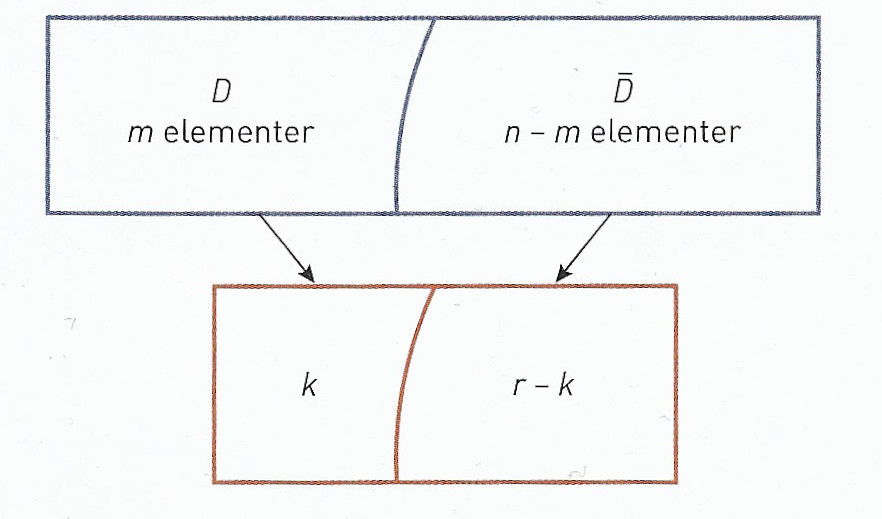

Vi lar $X$ stå for hvor mange av de elementene vi trekker som er fra $D$. Da er sannsynligheten for $X=k$ gitt som 
$$P(X=k) = \frac{\binom{m}{k}\binom{n-m}{r-k}}{\binom{n}{r}}$$
Disse sannsynligheter kaller vi **hypergeometriske sannsynligheter** og vi sier at $X$ er en hypergeometrisk fordelt tilfeldig variabel. Tallet $n$ kaller man også **populasjon** av den hypergeometrisk eksperiment.

**Spørsmål:** Se på tallene $n,m,r,k$ og mengder $D$, $\overline{D}$ i definisjonen av hypergeometrisk fordeling og tolk dem (dvs. finn ut hvilke tallene de tilsvarer) i russebil eksempel.

**Plass for dine notater**

[Geogebra](https://www.geogebra.org/) har noen enkle verktøy man kan bruke for å beregne hypergeometriske sannsynligheter.


#### Forventningsverdi til hypergeometrisk fordelte variabler

Vi skal utregne nå forventningsverdi til hypergeometrisk fordelte variabler. Antar at $X$ er en tilfeldig variabel som modellerer en hypergeometrisk situasjon med populasjon $n$, $r$ trekk og en delmengde av størrelse $m$.
Fra formelen for forventningsverdien ser vi at

$$\mathbb{E}(X) = \sum_{k=0}^m k P(X=k) = \sum_{k=0}^m k\frac{\binom{m}{k}\binom{n-m}{r-k}}{\binom{n}{r}}$$

Man kan utregne det og finne ut at
$$\mathbb{E}(X) = r\frac{m}{n}.$$ 

Den enkleste måten å gjøre det er ved hjelp av linearitet av forventningsverdier og dere skal se på det i ukentlige oppgaver. 